<a href="https://colab.research.google.com/github/garciamontes-hue/Actividade1/blob/main/Soluci%C3%B3n_del_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(rvest)

In [ ]:
%%R
url <- "https://www.statista.com/statistics/1105914/coronavirus-death-rates-worldwide/"
trading_webpage <- read_html(url)


In [ ]:
%%R
trading_names_html<- html_nodes(trading_webpage, 'table')
trading_names<- html_table(trading_names_html)
head(trading_names[[1]],3)

# A tibble: 3 × 7
  Characteristic `Confirmed cases` `Cases in last 7 days` Daily increase (# ca…¹
  <chr>          <chr>             <chr>                  <chr>                 
1 Réunion        3,882             6                      1                     
2 Yemen          11,818            0                      0                     
3 Sudan          62,093            14                     0                     
# ℹ abbreviated name: ¹​`Daily increase (# cases)`
# ℹ 3 more variables: `Number of deaths` <chr>,
#   `Daily increase (# deaths)` <int>, `Death rate (%)` <dbl>


In [ ]:
%%R
# Ver los nombres de las columnas
names(trading_names[[1]])


[1] "Characteristic"            "Confirmed cases"          
[3] "Cases in last 7 days"      "Daily increase (# cases)" 
[5] "Number of deaths"          "Daily increase (# deaths)"
[7] "Death rate (%)"           


In [ ]:
%%R
# Ver la estructura de los datos
str(trading_names[[1]])

tibble [221 × 7] (S3: tbl_df/tbl/data.frame)
 $ Characteristic           : chr [1:221] "Réunion" "Yemen" "Sudan" "Peru" ...
 $ Confirmed cases          : chr [1:221] "3,882" "11,818" "62,093" "3,561,677" ...
 $ Cases in last 7 days     : chr [1:221] "6" "0" "14" "4,538" ...
 $ Daily increase (# cases) : chr [1:221] "1" "0" "0" "801" ...
 $ Number of deaths         : chr [1:221] "742" "2,149" "4,930" "212,761" ...
 $ Daily increase (# deaths): int [1:221] 0 0 0 19 5 0 0 0 1 6 ...
 $ Death rate (%)           : num [1:221] 19.11 18.18 7.94 5.97 5.65 ...


In [ ]:
%%R
dim(trading_names[[1]])  # Devuelve (número de filas, número de columnas)


[1] 221   7


In [ ]:
%%R
# Acceder a la tabla
df <- trading_names[[1]]

# Contar NA por columna
na_por_variable <- colSums(is.na(df))

# Mostrar el resultado
print("Número de NA por variable:")
print(na_por_variable)


[1] "Número de NA por variable:"
           Characteristic           Confirmed cases      Cases in last 7 days 
                        0                         0                         0 
 Daily increase (# cases)          Number of deaths Daily increase (# deaths) 
                        0                         0                         0 
           Death rate (%) 
                        0 


In [ ]:
%%R
summary(trading_names[[1]])


 Characteristic     Confirmed cases    Cases in last 7 days
 Length:221         Length:221         Length:221          
 Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character    
                                                           
                                                           
                                                           
 Daily increase (# cases) Number of deaths   Daily increase (# deaths)
 Length:221               Length:221         Min.   :  0.00           
 Class :character         Class :character   1st Qu.:  0.00           
 Mode  :character         Mode  :character   Median :  0.00           
                                             Mean   : 10.91           
                                             3rd Qu.:  1.00           
                                             Max.   :341.00           
 Death rate (%) 
 Min.   : 0.02  
 1st Qu.: 0.55  
 Median : 0.99  
 Mean   : 1.49 

In [ ]:
%%R
# Acceder a la tabla original
df <- trading_names[[1]]

# Renombrar solo las columnas numéricas (de la 2 a la 7)
names(df)[2:7] <- c("Confirmed", "Last7Days", "DailyCases", "Deaths", "DailyDeaths", "DeathRate")

# Verifica los nombres
head(df)



# A tibble: 6 × 7
  Characteristic Confirmed Last7Days DailyCases Deaths  DailyDeaths DeathRate
  <chr>          <chr>     <chr>     <chr>      <chr>         <int>     <dbl>
1 Réunion        3,882     6         1          742               0     19.1 
2 Yemen          11,818    0         0          2,149             0     18.2 
3 Sudan          62,093    14        0          4,930             0      7.94
4 Peru           3,561,677 4,538     801        212,761          19      5.97
5 Mexico         5,733,925 4,655     140        324,134           5      5.65
6 Syria          55,799    17        2          3,150             0      5.65


In [ ]:
%%R
install.packages("dplyr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpbjYpBG/downloaded_packages’


In [ ]:
%%R
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [ ]:
%%R
df_clean <- df %>%
  mutate(
    Confirmed   = as.numeric(gsub(",", "", Confirmed)),
    Last7Days   = as.numeric(gsub(",", "", Last7Days)),
    DailyCases  = as.numeric(gsub(",", "", DailyCases)),
    Deaths      = as.numeric(gsub(",", "", Deaths)),
    DailyDeaths = as.numeric(gsub(",", "", DailyDeaths)),
    DeathRate   = as.numeric(gsub("%", "", DeathRate))
  )


In [ ]:
%%R
head(df_clean)

# A tibble: 6 × 7
  Characteristic Confirmed Last7Days DailyCases Deaths DailyDeaths DeathRate
  <chr>              <dbl>     <dbl>      <dbl>  <dbl>       <dbl>     <dbl>
1 Réunion             3882         6          1    742           0     19.1 
2 Yemen              11818         0          0   2149           0     18.2 
3 Sudan              62093        14          0   4930           0      7.94
4 Peru             3561677      4538        801 212761          19      5.97
5 Mexico           5733925      4655        140 324134           5      5.65
6 Syria              55799        17          2   3150           0      5.65


In [ ]:
%%R
summary(df_clean)


 Characteristic       Confirmed          Last7Days        DailyCases    
 Length:221         Min.   :    2641   Min.   :     0   Min.   :     0  
 Class :character   1st Qu.:   30752   1st Qu.:    17   1st Qu.:     0  
 Mode  :character   Median :  200990   Median :   250   Median :    13  
                    Mean   : 2303078   Mean   : 18657   Mean   :  2593  
                    3rd Qu.: 1101968   3rd Qu.:  2892   3rd Qu.:   215  
                    Max.   :80442894   Max.   :679183   Max.   :136798  
     Deaths        DailyDeaths       DeathRate    
 Min.   :     1   Min.   :  0.00   Min.   : 0.02  
 1st Qu.:   233   1st Qu.:  0.00   1st Qu.: 0.55  
 Median :  2201   Median :  0.00   Median : 0.99  
 Mean   : 28123   Mean   : 10.91   Mean   : 1.49  
 3rd Qu.: 14059   3rd Qu.:  1.00   3rd Qu.: 1.95  
 Max.   :986896   Max.   :341.00   Max.   :19.11  


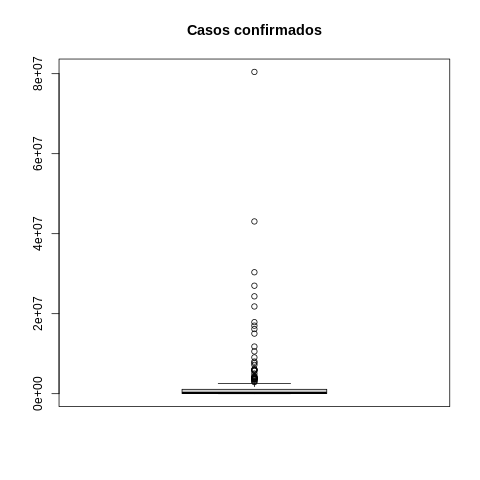

In [ ]:
%%R
boxplot(df_clean$Confirmed, main = "Casos confirmados")


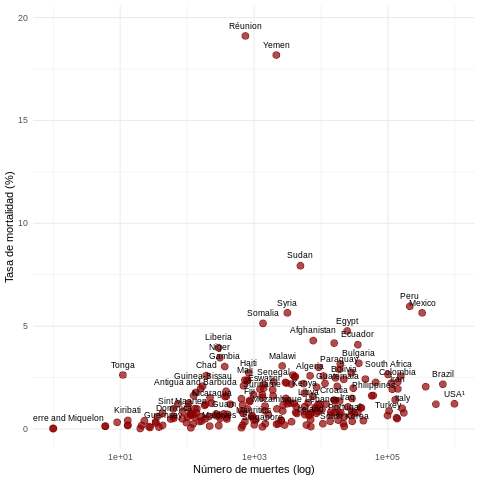

In [ ]:
%%R
library(ggplot2)

ggplot(df_clean, aes(x = Deaths, y = DeathRate, label = Characteristic)) +
  geom_point(color = "darkred", size = 3, alpha = 0.7) +
  geom_text(nudge_y = 0.5, check_overlap = TRUE, size = 3) +
  scale_x_log10() +  # Escala logarítmica para visualizar mejor los extremos
  labs(
    x = "Número de muertes (log)",
    y = "Tasa de mortalidad (%)"
  ) +
  theme_minimal()



In [ ]:
%%R
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.95.tar.gz'
Content type 'application/x-gzip' length 3745190 bytes (3.6 MB)
downloaded 3.6 MB


The downloaded source packages are in
	‘/tmp/RtmpbjYpBG/downloaded_packages’


corrplot 0.95 loaded


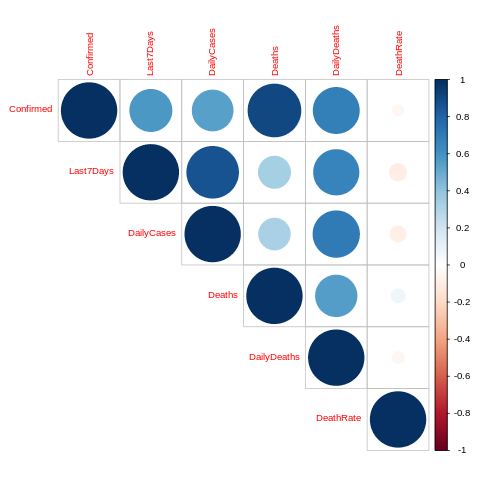

In [ ]:
%%R
library(corrplot)
cor_matrix <- cor(df_clean[, 2:7], use = "complete.obs")
corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 0.8)


In [ ]:
#solo verificación
%%R
cor_matrix <- cor(df_clean[, 2:7], use = "complete.obs")


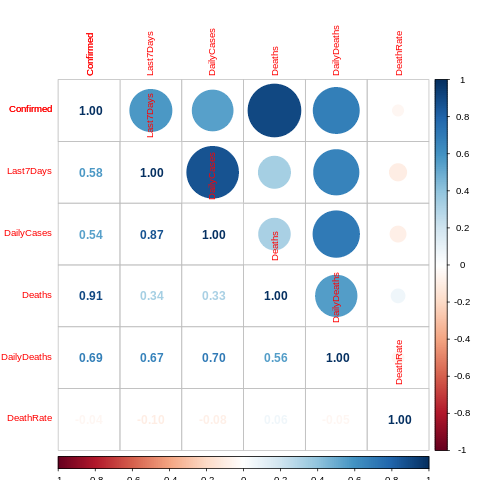

In [ ]:
#solo verificación
%%R
corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 0.8)
corrplot(cor_matrix, method = "number", type = "lower", tl.cex = 0.8, add = TRUE)


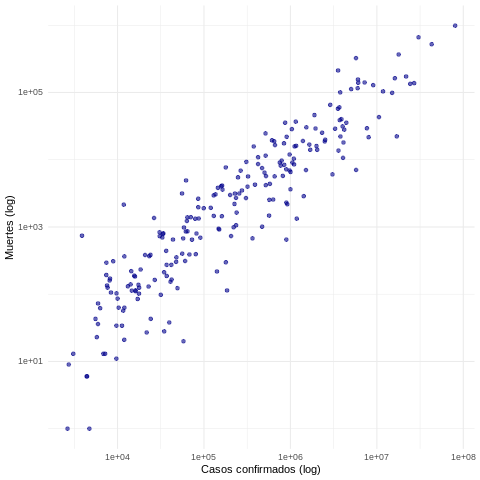

In [ ]:
%%R
ggplot(df_clean, aes(x = Confirmed, y = Deaths)) +
  geom_point(alpha = 0.6, color = "darkblue") +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "Casos confirmados (log)", y = "Muertes (log)") +
  theme_minimal()


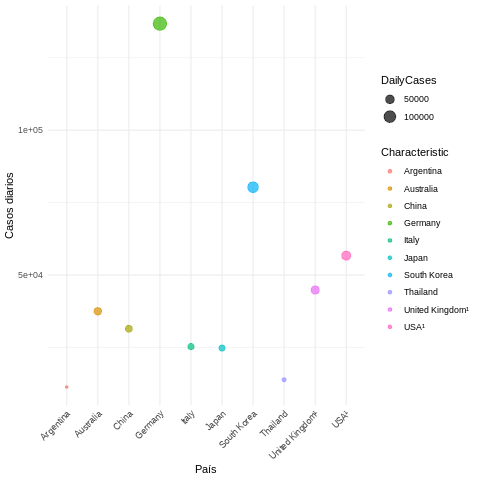

In [ ]:
%%R
df_clean %>%
  top_n(10, DailyCases) %>%
  ggplot(aes(x = Characteristic, y = DailyCases, size = DailyCases, color = Characteristic)) +
  geom_point(alpha = 0.7) +
  labs(x = "País", y = "Casos diarios") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



In [ ]:
%%R
install.packages("fmsb")
install.packages("tibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/fmsb_0.7.6.tar.gz'
Content type 'application/x-gzip' length 137455 bytes (134 KB)
downloaded 134 KB


The downloaded source packages are in
	‘/tmp/RtmpbjYpBG/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tibble_3.3.0.tar.gz'
Content type 'application/x-gzip' length 588671 bytes (574 KB)
downloaded 574 KB


The downloaded source packages are in
	‘/tmp/RtmpbjYpBG/downloaded_packages’


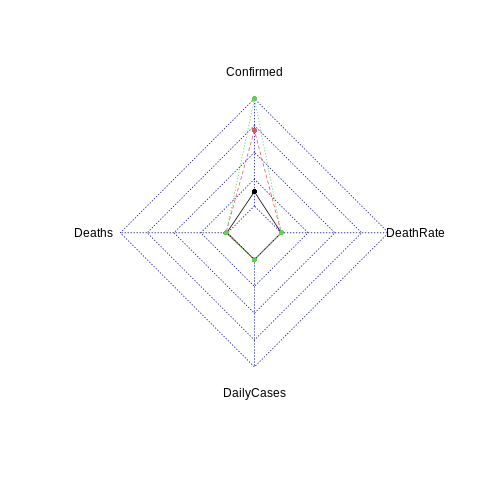

In [ ]:
%%R
library(fmsb)
df_radar <- df_clean %>% filter(Characteristic %in% c("Brazil", "Mexico", "India")) %>% select(Confirmed, Deaths, DailyCases, DeathRate)
df_radar <- rbind(rep(max(df_radar), ncol(df_radar)), rep(0, ncol(df_radar)), df_radar)
radarchart(df_radar)


In [ ]:
%%R
library(dplyr)
library(ggplot2)
top5 <- df_clean %>% arrange(desc(Deaths)) %>% slice(1:5) %>% mutate(Grupo = "Más muertes")
bottom5 <- df_clean %>% arrange(Deaths) %>% slice(1:5) %>% mutate(Grupo = "Menos muertes")

top_bottom <- bind_rows(top5, bottom5)

top_bottom


# A tibble: 10 × 8
   Characteristic    Confirmed Last7Days DailyCases Deaths DailyDeaths DeathRate
   <chr>                 <dbl>     <dbl>      <dbl>  <dbl>       <dbl>     <dbl>
 1 USA¹               80442894    286521      56690 986896         281      1.23
 2 Brazil             30355919     80700       6456 662964          73      2.18
 3 India              43060097     12503         11 522223           0      1.21
 4 Russia             17880154     51145       7529 367521         155      2.06
 5 Mexico              5733925      4655        140 324134           5      5.65
 6 Saint Pierre and…      2641       104          0      1           0      0.04
 7 New Zealand (Coo…      4727       526          0      1           1      0.02
 8 Palau                  4396       206          0      6           0      0.14
 9 Saint Barthelemy       4443        11         11      6           0      0.14
10 Anguilla               2731         0          0      9           0      0.33
# ℹ 1 mor

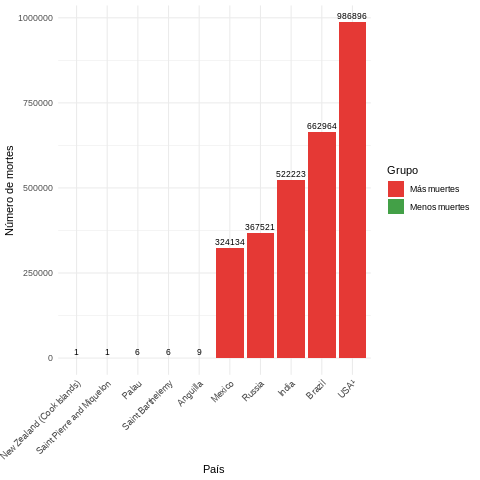

In [ ]:
%%R
ggplot(top_bottom, aes(x = reorder(Characteristic, Deaths), y = Deaths, fill = Grupo)) +
  geom_col() +
  geom_text(aes(label = Deaths), vjust = -0.5, size = 3) +
  labs(
    x = "País",
    y = "Número de mortes"
  ) +
  scale_fill_manual(values = c("Más muertes" = "#E53935", "Menos muertes" = "#43A047")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
